In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lending-club-dataset/lending_club_loan_two.csv
/kaggle/input/loan-data/data.csv


In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
df = pd.read_csv('/kaggle/input/lending-club-dataset/lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## Variable Description

**loan_amnt** >> The amount of the loan applied for by the borrower. 

**term** >> The number of payments on the loan. Values are in months and can be either 36 or 60.

**int_rate** >> Interest rate. 

**installment** >> The monthly payment for the loan.

**grade** >> LC assigned loan grade

**emp_title** >> Job title of the borrower

**emp_length** >> Employment lenghth in years

**verification_status** >> Indicates whether thte income source has been verified

**title** >> Loan title provided by the borrower

**annual_inc** >> The self-reported annual income provided by the borrower during registration.

**loan_status** >> Current status of the loan.

**zip_code** >> The first 3 numbers of the zip code provided by the borrower in the loan application.

**addr_state** >> The state provided by the borrower in the loan application

**dti** >> A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**earliest_cr_line** >> The year the borrower's earliest reported credit line was opened

**open_acc** >> The number of open credit lines in the borrower's credit file.

**pub_rec** >> Number of derogatory public records

**revol_bal** >> Total credit revolving balance

**revol_util** >> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

**total_acc** >> The total number of credit lines currently in the borrower's credit file

**mort_acc** >> Presence of mortgage accounts-- (1-present, 0-not present)

**pub_rec_bankruptcies** >> Presence of public record bankruptcies-- (1-present, 0-not present)

**home_ownership** >> The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER

**sub_grade** >> LC assigned loan subgrade

**purpose** >> A category provided by the borrower for the loan request.

**application_type** >> Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Missing Values

In [6]:
# Check for missing values
def missing_data(frame):
    total = frame.isnull().sum().sort_values(ascending=False)
    percent = (frame.isnull().sum()/frame.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_data(df)

,Total,Percent
mort_acc,37795,9.543469
emp_title,22927,5.789208
emp_length,18301,4.621115
title,1755,0.443148
pub_rec_bankruptcies,535,0.135091
revol_util,276,0.069692
loan_amnt,0,0.000000
dti,0,0.000000
application_type,0,0.000000
initial_list_status,0,0.000000


## Target Variable

In [7]:
# Percentage for each loan status type
df['loan_status'].value_counts(normalize=True) 

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

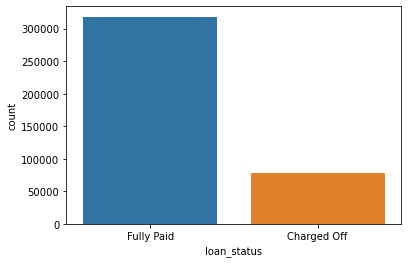

In [8]:
# Visualizing the target variable 
import seaborn as sns
sns.countplot(x=df['loan_status'])

## Features

In [9]:
# Display the number of unique values for each feature
features = df.columns.values
unique = pd.DataFrame(df[features].nunique().sort_values(), columns = ['UniqueValCounts'])
unique


,UniqueValCounts
initial_list_status,2
term,2
loan_status,2
verification_status,3
application_type,3
home_ownership,6
grade,7
pub_rec_bankruptcies,9
emp_length,11
purpose,14


In [10]:
cols = ['term', 'int_rate', 'installment', 'annual_inc', 'dti', 'earliest_cr_line', 'sub_grade',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

In [11]:
# Show Unique Value of Columns that have <100 unique entries
for col in cols:
    print("column : " + col)
    print(df[col].unique())
    print("")

column : term
[' 36 months' ' 60 months']

column : int_rate
[11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.49 18.99  5.79 19.29 14.54 14.09  9.25 19.05
 17.77 18.92 20.75 10.65 18.85 10.59 12.85 11.39 13.65 13.06  7.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

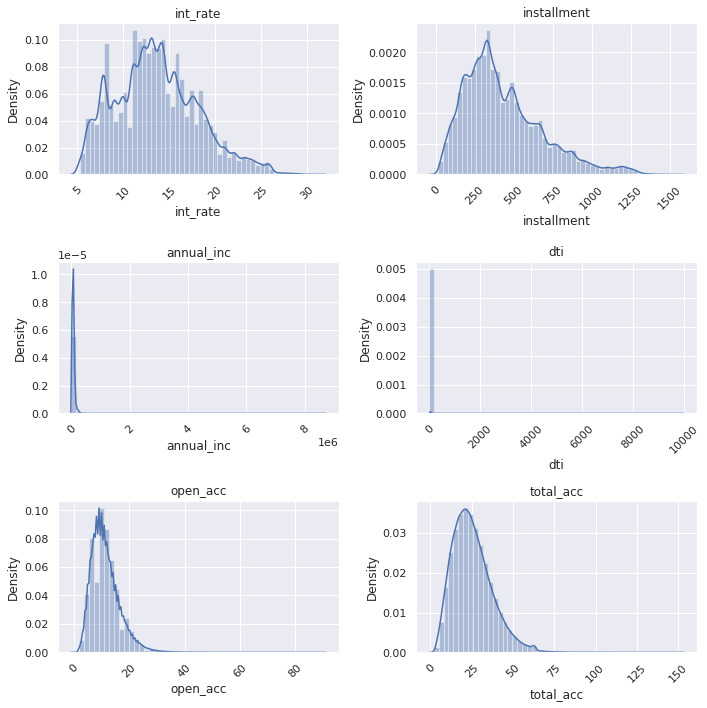

In [12]:
# Plot the distribution of the numerical values 
import matplotlib.pyplot as plt
dist_cols = ['int_rate','installment', 'annual_inc', 'dti', 'open_acc', 'total_acc']

fig, ax = plt.subplots(3, 2, figsize=(10,10))
sns.set()
i = 1
for col in dist_cols:
    ax = plt.subplot(3, 2, i, label='small')
    sns.distplot(df[col])
    ax.set_title(col, fontsize=12)
    plt.xticks(rotation=45)
    i += 1


fig.tight_layout()
plt.show()

<AxesSubplot:>

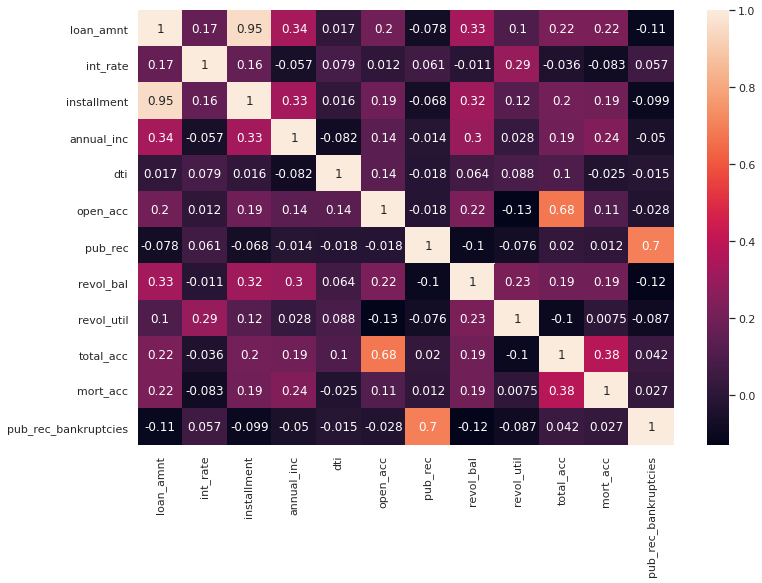

In [13]:
# Check correlations between numerical vars
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

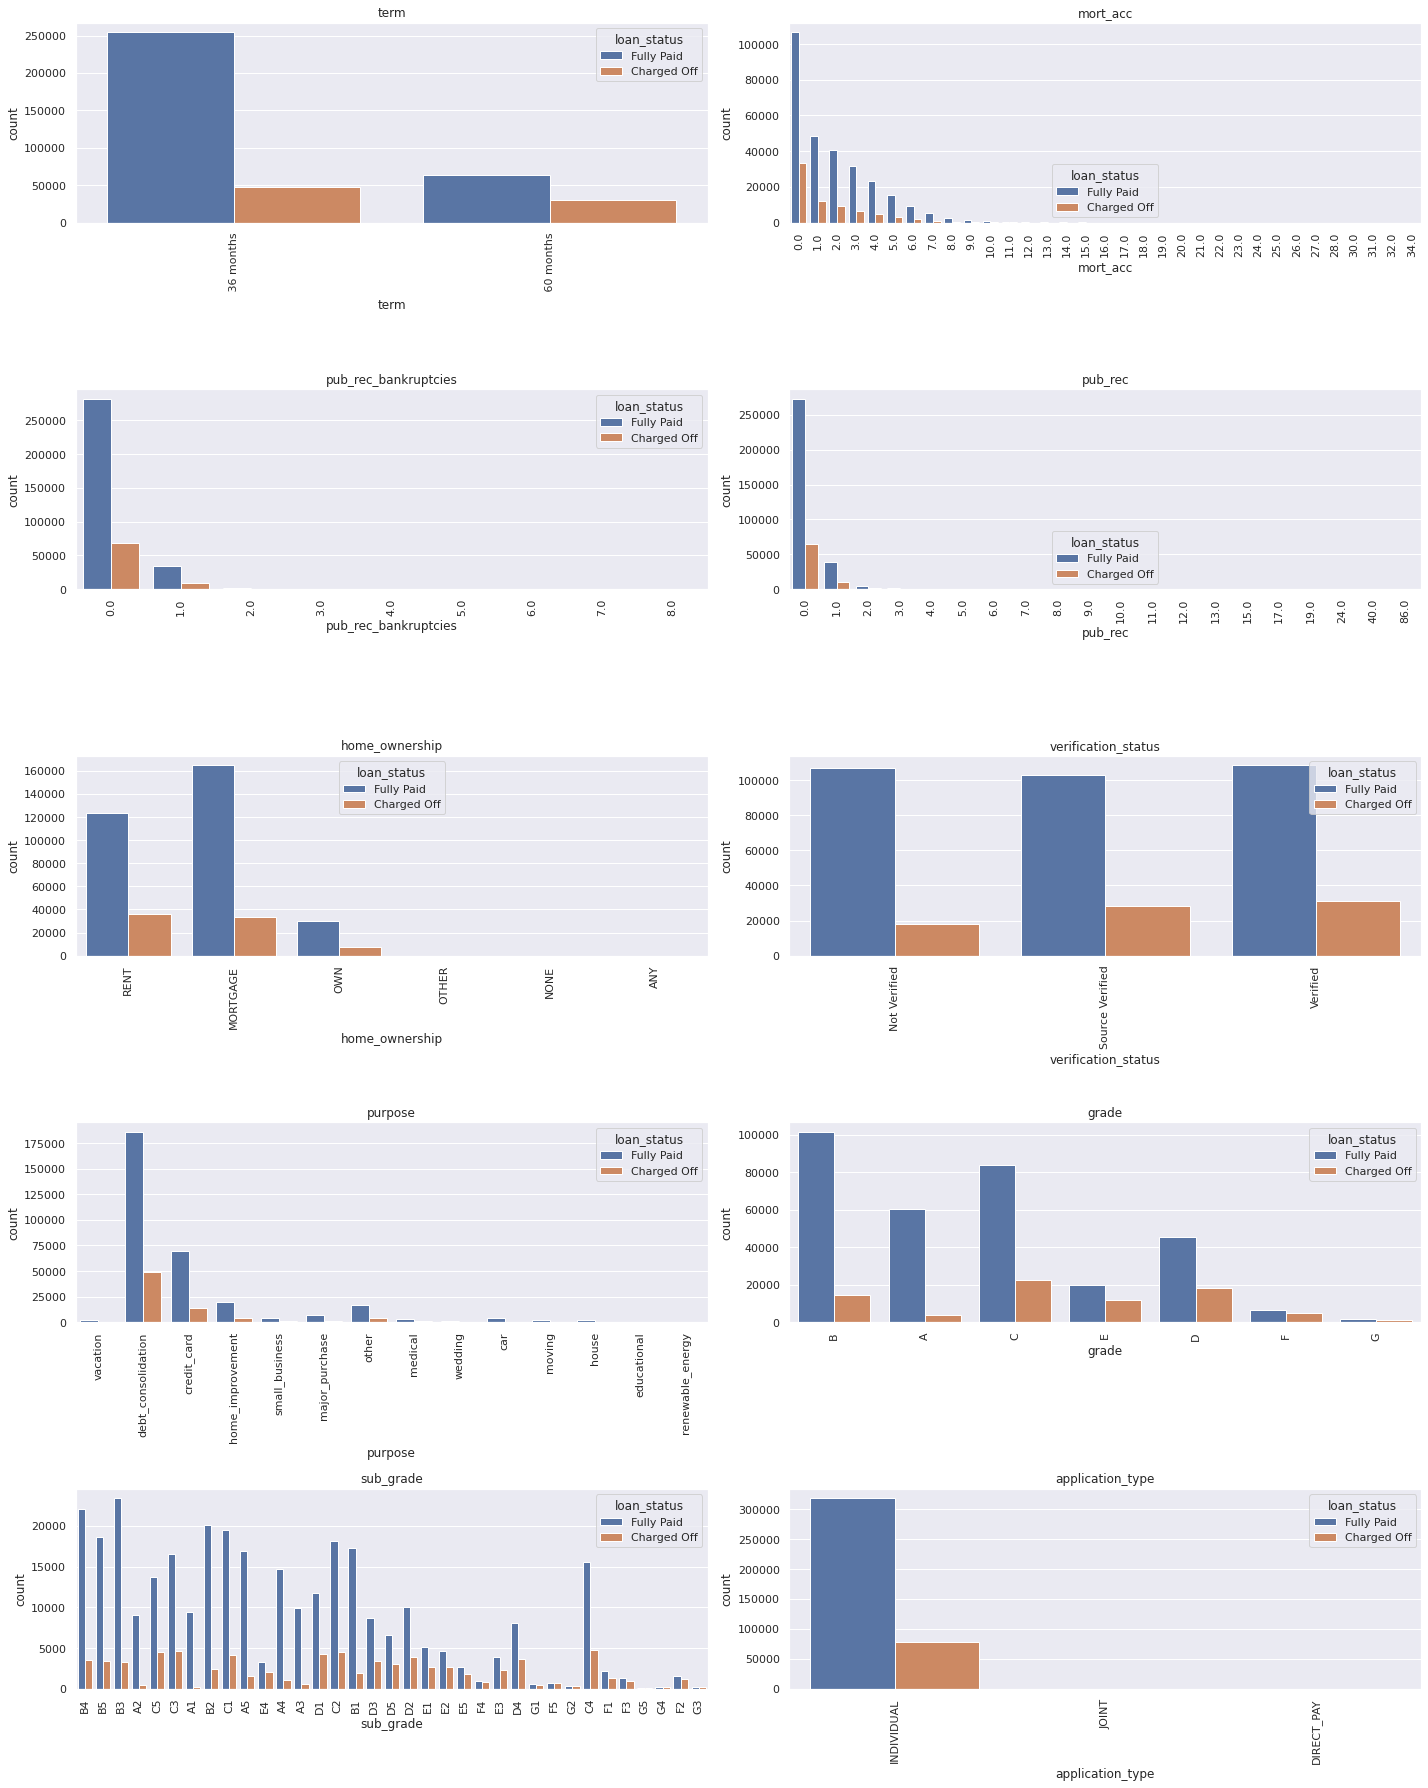

In [14]:
# Plot the distribution of the categorical values 
count_cols = ['term','mort_acc', 'pub_rec_bankruptcies', 'pub_rec', 'home_ownership', 'verification_status','purpose', 
              'grade', 'sub_grade', 'application_type']

fig, ax = plt.subplots(5, 2, figsize=(20,25))
sns.set()
i = 1
for col in count_cols:
    ax = plt.subplot(5, 2, i, label='small')
    sns.countplot(x=col, data=df, hue='loan_status')
    ax.set_title(col, fontsize=12)
    plt.xticks(rotation=90)
    i += 1


fig.tight_layout()
plt.show()

In [15]:
# Check the job titles of the borrowers
df.emp_title.unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [16]:
# Transform the emp_title variable and prepare for visualization
df.emp_title = df.emp_title.str.lower()

def manager(string):
    if type(string) is str:
        return 'manager' if 'manager' in string else string

def president(string):
    if type(string) is str:
        return 'president' if 'president' in string else string
    
def nurse(string):
    if type(string) is str:
        return 'nurse' if 'nurse' in string else string
    
def driver(string):
    if type(string) is str:
        return 'driver' if 'driver' in string else string
    
def assistant(string):
    if type(string) is str:
        return 'assistant' if 'assistant' in string else string

def engineer(string):
    if type(string) is str:
        return 'engineer' if 'engineer' in string else string    

functions = [manager, president, nurse, driver, assistant, engineer]
for func in functions:
    df['emp_title'] = df.emp_title.apply(func)

In [17]:
 df['emp_title'].value_counts()

manager                      39831
engineer                      8603
assistant                     7548
driver                        5743
teacher                       5430
                             ...  
home depot rdc                   1
beyondsoft consulting            1
counter associate                1
swagelok western new york        1
grocery reclaims                 1
Name: emp_title, Length: 139595, dtype: int64

<BarContainer object of 10 artists>

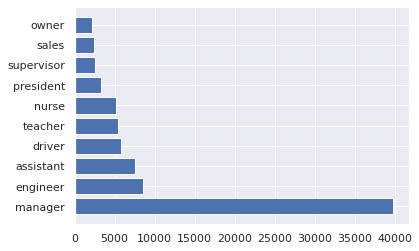

In [18]:
# Plot the 10 most common job titles of borrowers
plt.barh(df.emp_title.value_counts()[:10].index, df.emp_title.value_counts()[:10])

In [19]:
# Check the employment lengths of the borrowers
df.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

[Text(0, 0, '< 1 year'),
 Text(1, 0, '1 year'),
 Text(2, 0, '2 years'),
 Text(3, 0, '3 years'),
 Text(4, 0, '4 years'),
 Text(5, 0, '5 years'),
 Text(6, 0, '6 years'),
 Text(7, 0, '7 years'),
 Text(8, 0, '8 years'),
 Text(9, 0, '9 years'),
 Text(10, 0, '10+ years')]

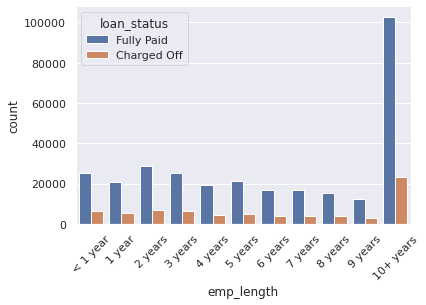

In [20]:
# Transform the emp_length variable and prepare for visualization

order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
plot = sns.countplot(x='emp_length', data=df, hue='loan_status', order=order)
plot.set_xticklabels(labels=order,rotation=45)

## Data Pre-Processing

In [21]:
# Transform the target variable to numeric
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [22]:
# Transform pub_rec, pub_rec, pub_rec_bankruptcies to handle the outliers
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['mort_acc'] = df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [23]:
# Drop job titles since they are too many to be one hot encoded
df.drop('emp_title', axis=1, inplace=True)

In [24]:
df.title.unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [25]:
df.purpose.unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [26]:
df.home_ownership.value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [27]:
# Merge NONE and ANY with OTHER
df.loc[(df.home_ownership == 'ANY') | (df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'

In [28]:
# Drop title and emp_length column since they doesn't provide insightful information for training
df.drop(['title', 'emp_length'], axis=1, inplace=True)

In [29]:
# Impute the missing values for mort_acc feature 
total_acc_avg = df.groupby(by='total_acc').mean().mort_acc
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [30]:
df.mort_acc.isnull().mean()

0.0

In [31]:
# Transform feature to numeric
df['term'] = df.term.replace(' 36 months', 36).replace(' 60 months', 60)
df.term.unique()

array([36, 60])

In [32]:
# Drop grade as it provides the ame information as sub_grade
df.drop('grade', axis=1, inplace=True)

In [33]:
df.dropna(inplace=True)

In [34]:
# One-hot encoding for categorical variables
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [35]:
# Create zipcode feature from address(better indicator than the addres itself)
df['zip_code'] = df.address.apply(lambda x: x[-5:])
# One-hot encoding
df = pd.get_dummies(df, columns=['zip_code'], drop_first=True)
# Drop address feaure as we don't need it anymore
df.drop('address', axis=1, inplace=True)

In [36]:
# Drop issue_d column since they doesn't provide insightful information for training
df.drop('issue_d', axis=1, inplace=True)

In [37]:
# Extract year from earliest_cr_line
df['earliest_cr_line'] = df.earliest_cr_line.str.split('-', expand=True)[1]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


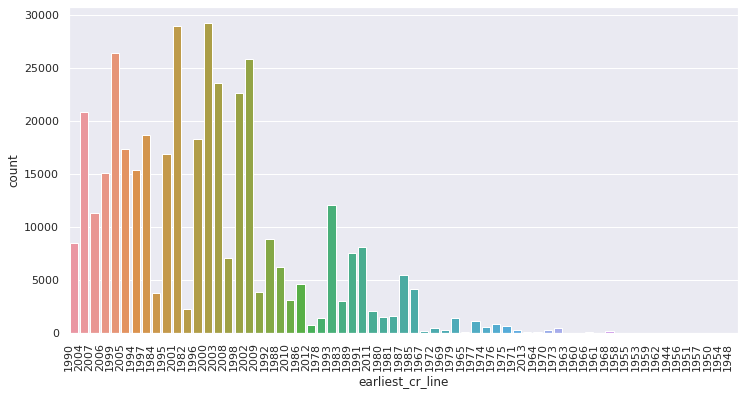

In [38]:
# PLotting the yars when the credit file have been opened
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(df['earliest_cr_line'], label='vertical', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

In [39]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [40]:
df.shape

(395219, 79)

In [41]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', '

## More Visualizations

<AxesSubplot:xlabel='loan_amnt_interval', ylabel='loan_status'>

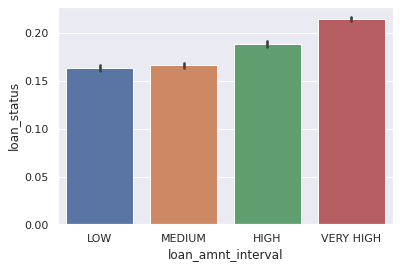

In [44]:
# Binning of the numerical values 
df["loan_amnt_interval"] = pd.cut(
    x=df["loan_amnt"],
    bins=[0, 5000, 9300, 12000, 25000],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)

# Plotting the numerical values against the target variable
sns.barplot(x=df["loan_amnt_interval"], y=df["loan_status"])

<AxesSubplot:xlabel='annual_inc_interval', ylabel='loan_status'>

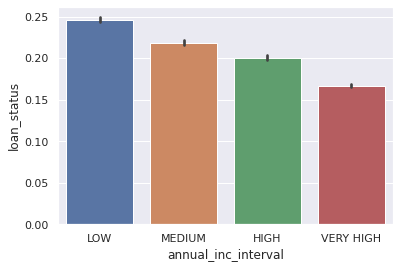

In [45]:
# Binning of the numerical values 
data["annual_inc_interval"] = pd.cut(
    x=data["annual_inc"],
    bins=[0, 40000, 53000, 71000, 120000],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
# Plotting the numerical values against the target variable
sns.barplot(x=data["annual_inc_interval"], y=data["loan_status"])

<AxesSubplot:xlabel='installment_interval', ylabel='loan_status'>

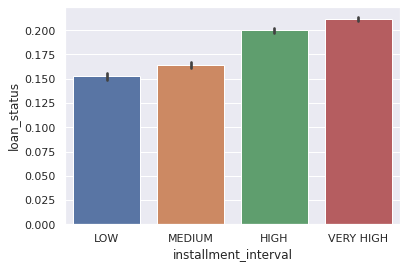

In [46]:
# Binning of the numerical values 
data["installment_interval"] = pd.cut(
    x=data["installment"],
    bins=[0, 156, 250, 368, 905],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
# Plotting the numerical values against the target variable
sns.barplot(x=data["installment_interval"], y=data["loan_status"])

<AxesSubplot:xlabel='dti_interval', ylabel='loan_status'>

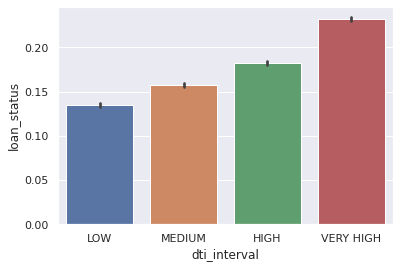

In [47]:
# Binning of the numerical values 
data["dti_interval"] = pd.cut(
    x=data["dti"],
    bins=[0, 9, 14, 19, 30],
    include_lowest=True,
    labels=["LOW", "MEDIUM", "HIGH", "VERY HIGH"],
)
# Plotting the numerical values against the target variable
sns.barplot(x=data["dti_interval"], y=data["loan_status"])


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='loan_status'>

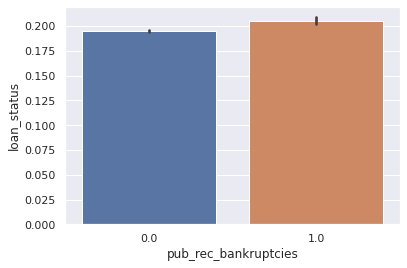

In [48]:
# Plotting the categorical values against the target variable
sns.barplot(x=data["pub_rec_bankruptcies"], y=data["loan_status"])

<AxesSubplot:xlabel='term', ylabel='loan_status'>

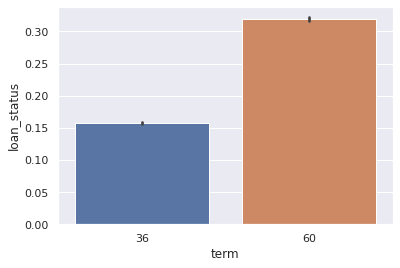

In [49]:
# Plotting the categorical values against the target variable
sns.barplot(x=data["term"], y=data["loan_status"])

<AxesSubplot:xlabel='mort_acc', ylabel='loan_status'>

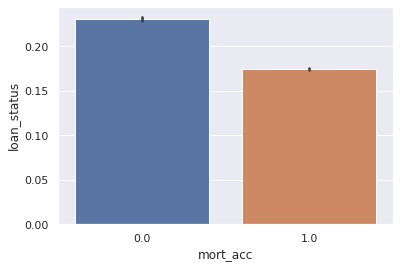

In [50]:
# Plotting the categorical values against the target variable
sns.barplot(x=data["mort_acc"], y=data["loan_status"])

## Observations

We have a dataset of shape (395219, 79). Some of the columns have already been one-hot encoded, thus, the total number of unique features is actually 21.

Some interesting facts about our data:
 * Minimum amount of load is 500, while the maximum 40k
 * Minimum interest rate is 5.3% , while the maximum 31% (looks like an outlier)
 * Some borrowers have 0 annual income
 * The oldest loan application opened was in 1944
 * 80% of the loans in our dataset have been fully paid while 19,6% have been charged off
 * All the numericala features plotted have a distribution skewed to the left, which might indicate the existent of some extreme values.
 * The most common term for loan repayment is 36 months.
 * Most of the borrowers have a mortgage account.
 * 1/7 of the borrowers have a public record of bankrupcy
 * 2001 and 2002 have been the years with the most loan application filed.
 
 When looking at some of the feature and their relationship with the defaulter_rate(charged off/total) we observe:
 * Borrowers with loan amounts with 25k> are more likeyl to default. We see the same trend in the installments feature and dti.
 * Borrowers with a low annual income are almost 25% likely to default
 * Borrowers with a public record of bankrupcy are as likely to default as borrowers without a record
 * Borrowers who have a mortgage to pay are eless likely to default
 * Borrowers with a lan repyment of 60 months are twice more prone to default (probably becaus they have higher amount to repay.)


